In [ ]:
# %pip install prophet

In [ ]:
# %pip install pystan

In [1]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from prophet import Prophet

In [3]:
df = pd.read_csv('Traffic_Junc/Junc2.csv')
df.head(20)

,DateTime,Junction,Vehicles,year
0,2015-11-01 00:00:00,2,6,2015
1,2015-11-01 01:00:00,2,6,2015
2,2015-11-01 02:00:00,2,5,2015
3,2015-11-01 03:00:00,2,6,2015
4,2015-11-01 04:00:00,2,7,2015
5,2015-11-01 05:00:00,2,2,2015
6,2015-11-01 06:00:00,2,4,2015
7,2015-11-01 07:00:00,2,4,2015
8,2015-11-01 08:00:00,2,3,2015
9,2015-11-01 09:00:00,2,3,2015


In [4]:
df.dtypes

DateTime    object
Junction     int64
Vehicles     int64
year         int64
dtype: object

In [6]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.dtypes

DateTime    datetime64[ns]
Junction             int64
Vehicles             int64
year                 int64
dtype: object

In [7]:
df.drop('year', axis=1, inplace=True)

In [8]:
df.drop('Junction', axis=1, inplace=True)

In [10]:
df.columns = ['ds', 'y']

In [11]:
df

,ds,y
0,2015-11-01 00:00:00,6
1,2015-11-01 01:00:00,6
2,2015-11-01 02:00:00,5
3,2015-11-01 03:00:00,6
4,2015-11-01 04:00:00,7
...,...,...
14587,2017-06-30 19:00:00,34
14588,2017-06-30 20:00:00,35
14589,2017-06-30 21:00:00,31
14590,2017-06-30 22:00:00,29


In [13]:
m = Prophet(interval_width=0.85)
trained_model = m.fit(df)

15:00:56 - cmdstanpy - INFO - Chain [1] start processing
15:01:22 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
future = m.make_future_dataframe(periods=1000)
make_predictions = trained_model.predict(future)

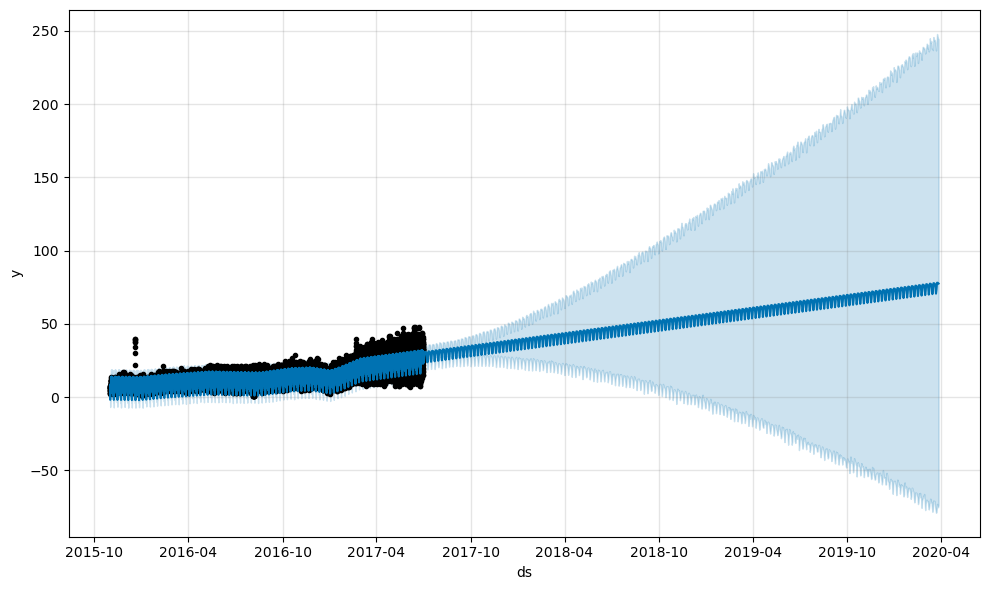

In [17]:
plot1 = m.plot(make_predictions)